In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import (
    SequentialFeatureSelector,
)
from mlxtend.evaluate import feature_importance_permutation
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.utils.estimator_checks import check_estimator
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import matplotlib.ticker as ticker
import os
from pathlib import Path
import json

import sys

sys.path.append("scripts")

import utils
import distclassipy as dcpy

cd = dcpy.Distance()

In [2]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
np.random.seed(settings_dict["seed_choice"])

classification_letter = "c"
classification_problem = settings_dict["classification_problem"][classification_letter]
classes_to_keep = settings_dict["classes_to_keep"][classification_letter]
results_subfolder = f"{classification_letter}. {classification_problem}"
sns_dict = settings_dict["sns_dict"]

sns.set_theme(**sns_dict)

In [3]:
check_estimator(dcpy.DistanceMetricClassifier())  # passes

In [4]:
# Load Data
X_df_FULL = pd.read_csv("data/X_df.csv", index_col=0)
y_df_FULL = pd.read_csv("data/y_df.csv", index_col=0)

In [5]:
# Remove manually selected 'bad' features
with open(os.path.join("results", results_subfolder, "drop_features.txt")) as f:
    bad_features = json.load(f)  # manually selected

X_df_FULL = X_df_FULL.drop(bad_features, axis=1)

print(X_df_FULL.shape[1])

31


In [6]:
# Keep only current classes
cl_keep_str = "_".join(classes_to_keep)

y_df = y_df_FULL[y_df_FULL["class"].isin(classes_to_keep)]
X_df = X_df_FULL.loc[y_df.index]
X = X_df.to_numpy()
y = y_df.to_numpy().ravel()

In [7]:
all_metrics = [
    "euclidean",
    "braycurtis",
    "canberra",
    "cityblock",
    "chebyshev",
    cd.clark,
    "correlation",
    "cosine",
    cd.hellinger,
    cd.jaccard,
    cd.lorentzian,
    cd.marylandbridge,
    cd.meehl,
    cd.motyka,
    cd.soergel,
    cd.wave_hedges,
    cd.kulczynski,
    cd.add_chisq,
]

scoring = "f1_macro"

In [8]:
from IPython.display import IFrame

In [9]:
with open(os.path.join("results", results_subfolder, "best_common_features.txt")) as f:
    best_common_features = json.load(f)

  0%|          | 0/18 [00:00<?, ?it/s]

******************** Euclidean ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.79
	Harmonics_phase_2_r feature: 0.77
	IAR_phi_r feature: 0.77
	GP_DRW_tau_r feature: 0.79
	MHPS_low_r feature: 0.78
	Rcs_r feature: 0.81


	MHPS_ratio_r feature: 0.78
	Harmonics_mag_1_r feature: 0.80
	Psi_eta_r feature: 0.80
	Harmonics_phase_5_r feature: 0.80
	Amplitude_r feature: 0.82
	Harmonics_mag_7_r feature: 0.74
	Beyond1Std_r feature: 0.79


	Eta_e_r feature: 0.81
	Gskew_r feature: 0.77


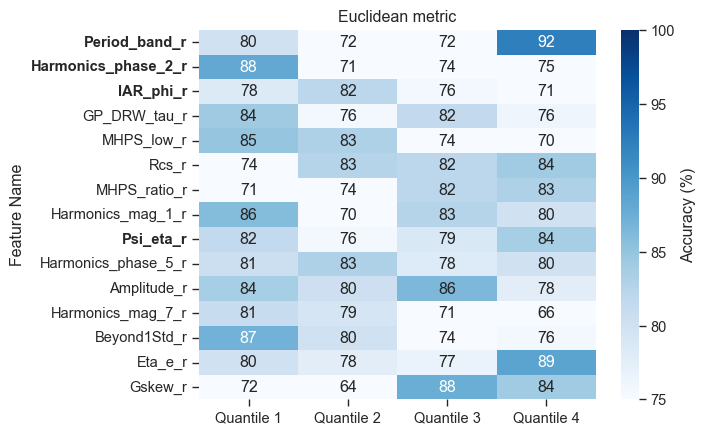

******************** Braycurtis ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.91
	Harmonics_phase_2_r feature: 0.91
	IAR_phi_r feature: 0.91
	GP_DRW_tau_r feature: 0.90
	MHPS_low_r feature: 0.89


	Rcs_r feature: 0.90
	MHPS_ratio_r feature: 0.91
	Harmonics_mag_1_r feature: 0.91
	Psi_eta_r feature: 0.90
	Harmonics_phase_5_r feature: 0.91
	Amplitude_r feature: 0.91
	Harmonics_mag_7_r feature: 0.89
	Beyond1Std_r feature: 0.90


	Eta_e_r feature: 0.90
	Gskew_r feature: 0.89


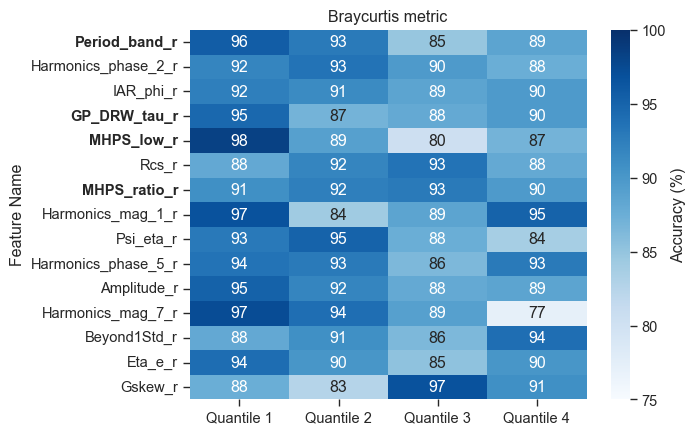

******************** Canberra ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.90
	Harmonics_phase_2_r feature: 0.91
	IAR_phi_r feature: 0.91
	GP_DRW_tau_r feature: 0.90


	MHPS_low_r feature: 0.91
	Rcs_r feature: 0.91
	MHPS_ratio_r feature: 0.91
	Harmonics_mag_1_r feature: 0.91
	Psi_eta_r feature: 0.91
	Harmonics_phase_5_r feature: 0.92
	Amplitude_r feature: 0.91
	Harmonics_mag_7_r feature: 0.90
	Beyond1Std_r feature: 0.91
	Eta_e_r feature: 0.91
	Gskew_r feature: 0.92


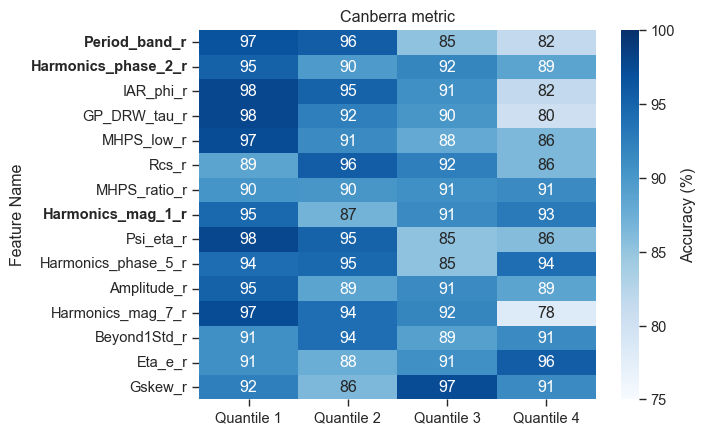

******************** Cityblock ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.83
	Harmonics_phase_2_r feature: 0.82
	IAR_phi_r feature: 0.83
	GP_DRW_tau_r feature: 0.85
	MHPS_low_r feature: 0.85
	Rcs_r feature: 0.86
	MHPS_ratio_r feature: 0.83


	Harmonics_mag_1_r feature: 0.87
	Psi_eta_r feature: 0.87
	Harmonics_phase_5_r feature: 0.86
	Amplitude_r feature: 0.84
	Harmonics_mag_7_r feature: 0.78
	Beyond1Std_r feature: 0.84
	Eta_e_r feature: 0.81
	Gskew_r feature: 0.82


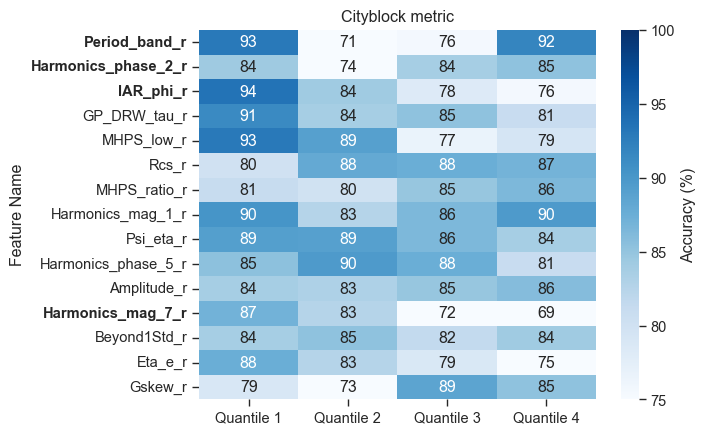

******************** Chebyshev ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.75
	Harmonics_phase_2_r feature: 0.77
	IAR_phi_r feature: 0.76
	GP_DRW_tau_r feature: 0.74
	MHPS_low_r feature: 0.76
	Rcs_r feature: 0.76


	MHPS_ratio_r feature: 0.75
	Harmonics_mag_1_r feature: 0.74
	Psi_eta_r feature: 0.76
	Harmonics_phase_5_r feature: 0.79
	Amplitude_r feature: 0.74
	Harmonics_mag_7_r feature: 0.73
	Beyond1Std_r feature: 0.75
	Eta_e_r feature: 0.75
	Gskew_r feature: 0.74


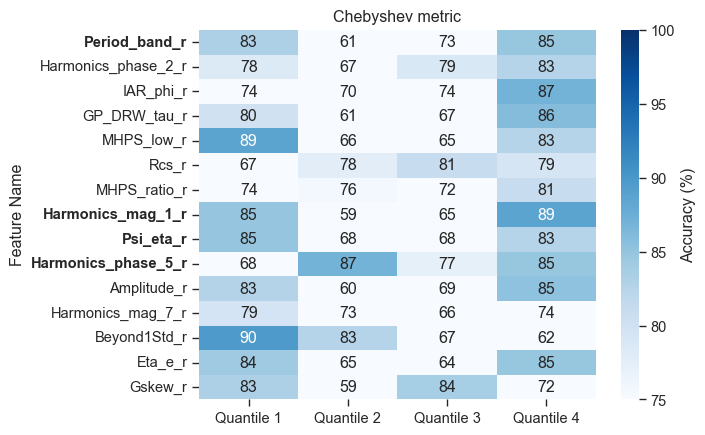

******************** Clark ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.90
	Harmonics_phase_2_r feature: 0.92
	IAR_phi_r feature: 0.91


	GP_DRW_tau_r feature: 0.91
	MHPS_low_r feature: 0.91
	Rcs_r feature: 0.91


	MHPS_ratio_r feature: 0.90
	Harmonics_mag_1_r feature: 0.91
	Psi_eta_r feature: 0.93
	Harmonics_phase_5_r feature: 0.93


	Amplitude_r feature: 0.92
	Harmonics_mag_7_r feature: 0.90
	Beyond1Std_r feature: 0.91


	Eta_e_r feature: 0.93
	Gskew_r feature: 0.93


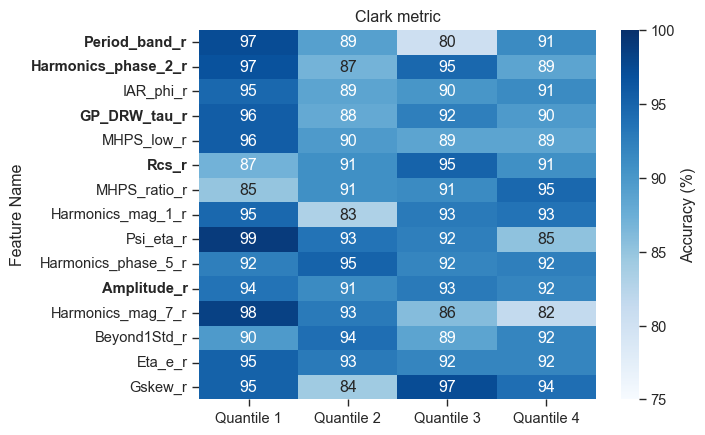

******************** Correlation ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.80
	Harmonics_phase_2_r feature: 0.82
	IAR_phi_r feature: 0.81
	GP_DRW_tau_r feature: 0.80
	MHPS_low_r feature: 0.81
	Rcs_r feature: 0.82
	MHPS_ratio_r feature: 0.83
	Harmonics_mag_1_r feature: 0.80
	Psi_eta_r feature: 0.82
	Harmonics_phase_5_r feature: 0.82
	Amplitude_r feature: 0.82


	Harmonics_mag_7_r feature: 0.82
	Beyond1Std_r feature: 0.82
	Eta_e_r feature: 0.81
	Gskew_r feature: 0.81


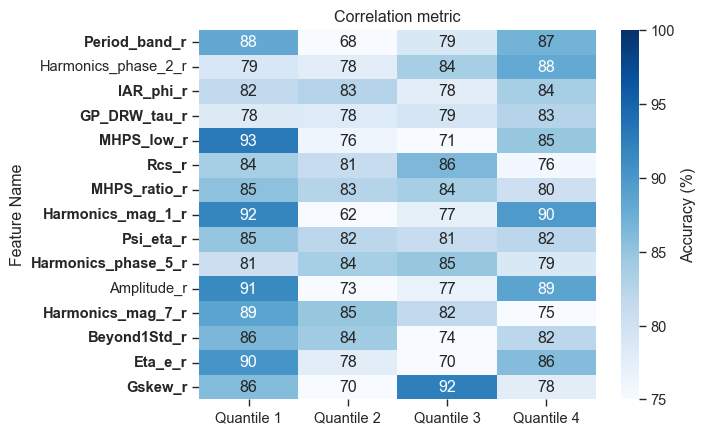

******************** Cosine ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.83
	Harmonics_phase_2_r feature: 0.83
	IAR_phi_r feature: 0.84
	GP_DRW_tau_r feature: 0.83
	MHPS_low_r feature: 0.84
	Rcs_r feature: 0.85
	MHPS_ratio_r feature: 0.84
	Harmonics_mag_1_r feature: 0.85


	Psi_eta_r feature: 0.86
	Harmonics_phase_5_r feature: 0.83
	Amplitude_r feature: 0.87
	Harmonics_mag_7_r feature: 0.84
	Beyond1Std_r feature: 0.83
	Eta_e_r feature: 0.84
	Gskew_r feature: 0.83


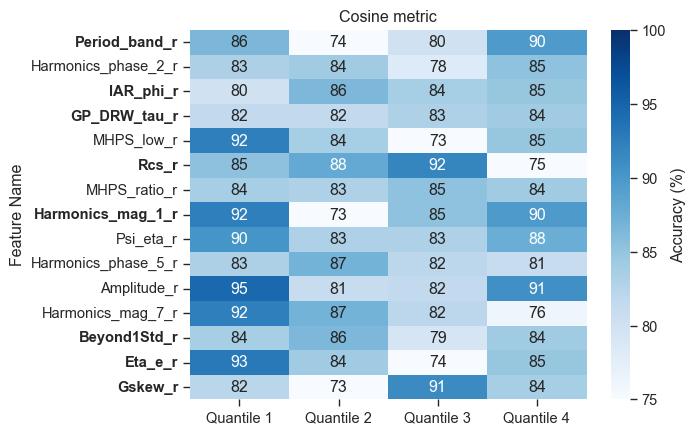

******************** Hellinger ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.91
	Harmonics_phase_2_r feature: 0.91
	IAR_phi_r feature: 0.92
	GP_DRW_tau_r feature: 0.91
	MHPS_low_r feature: 0.91


	Rcs_r feature: 0.92
	MHPS_ratio_r feature: 0.91
	Harmonics_mag_1_r feature: 0.92
	Psi_eta_r feature: 0.92
	Harmonics_phase_5_r feature: 0.92
	Amplitude_r feature: 0.91


	Harmonics_mag_7_r feature: 0.90


	Beyond1Std_r feature: 0.91


	Eta_e_r feature: 0.92


	Gskew_r feature: 0.92


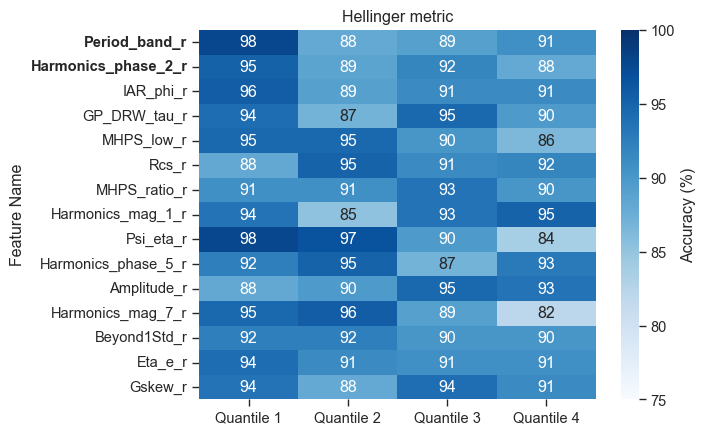

******************** Jaccard ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.87
	Harmonics_phase_2_r feature: 0.89
	IAR_phi_r feature: 0.88
	GP_DRW_tau_r feature: 0.89
	MHPS_low_r feature: 0.87
	Rcs_r feature: 0.88
	MHPS_ratio_r feature: 0.89


	Harmonics_mag_1_r feature: 0.88
	Psi_eta_r feature: 0.90
	Harmonics_phase_5_r feature: 0.89
	Amplitude_r feature: 0.89
	Harmonics_mag_7_r feature: 0.88
	Beyond1Std_r feature: 0.89
	Eta_e_r feature: 0.89
	Gskew_r feature: 0.89


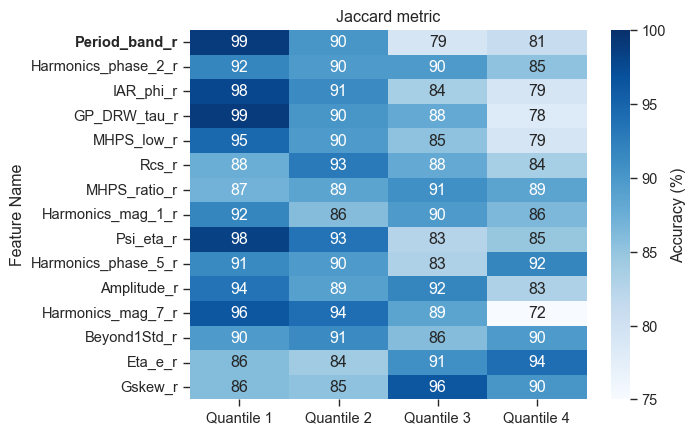

******************** Lorentzian ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.86
	Harmonics_phase_2_r feature: 0.85
	IAR_phi_r feature: 0.86
	GP_DRW_tau_r feature: 0.89
	MHPS_low_r feature: 0.86
	Rcs_r feature: 0.88


	MHPS_ratio_r feature: 0.86
	Harmonics_mag_1_r feature: 0.89
	Psi_eta_r feature: 0.89
	Harmonics_phase_5_r feature: 0.89
	Amplitude_r feature: 0.86


	Harmonics_mag_7_r feature: 0.82
	Beyond1Std_r feature: 0.87
	Eta_e_r feature: 0.84
	Gskew_r feature: 0.85


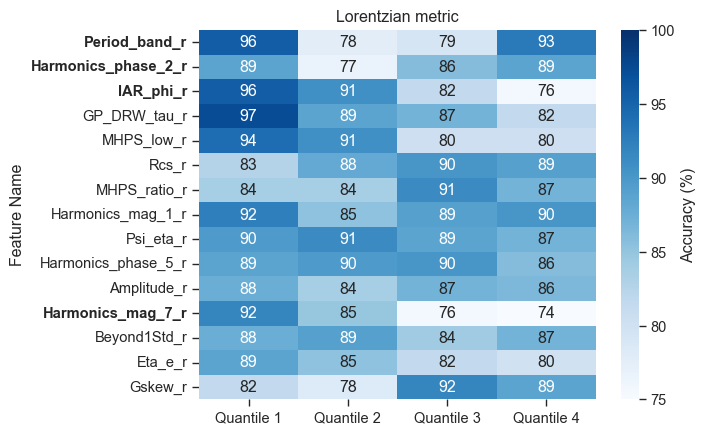

******************** Marylandbridge ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.74
	Harmonics_phase_2_r feature: 0.73
	IAR_phi_r feature: 0.74
	GP_DRW_tau_r feature: 0.73
	MHPS_low_r feature: 0.73
	Rcs_r feature: 0.75
	MHPS_ratio_r feature: 0.74


	Harmonics_mag_1_r feature: 0.72
	Psi_eta_r feature: 0.73
	Harmonics_phase_5_r feature: 0.77
	Amplitude_r feature: 0.77
	Harmonics_mag_7_r feature: 0.75
	Beyond1Std_r feature: 0.77
	Eta_e_r feature: 0.76


	Gskew_r feature: 0.75


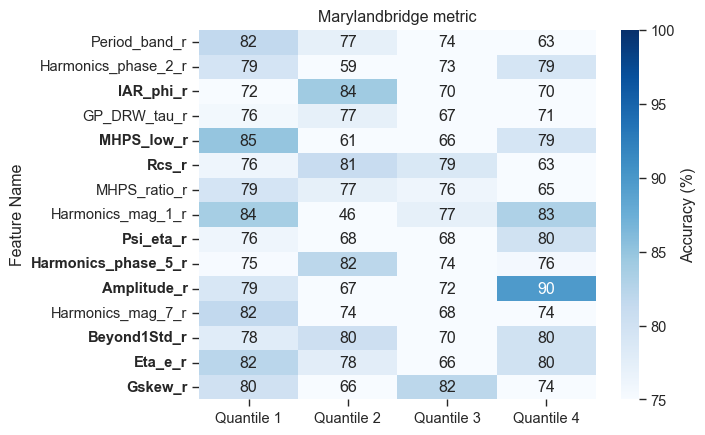

******************** Meehl ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.79
	Harmonics_phase_2_r feature: 0.80


	IAR_phi_r feature: 0.79
	GP_DRW_tau_r feature: 0.80


	MHPS_low_r feature: 0.78
	Rcs_r feature: 0.80


	MHPS_ratio_r feature: 0.78
	Harmonics_mag_1_r feature: 0.79


	Psi_eta_r feature: 0.79
	Harmonics_phase_5_r feature: 0.80


	Amplitude_r feature: 0.80
	Harmonics_mag_7_r feature: 0.76


	Beyond1Std_r feature: 0.78
	Eta_e_r feature: 0.82


	Gskew_r feature: 0.75


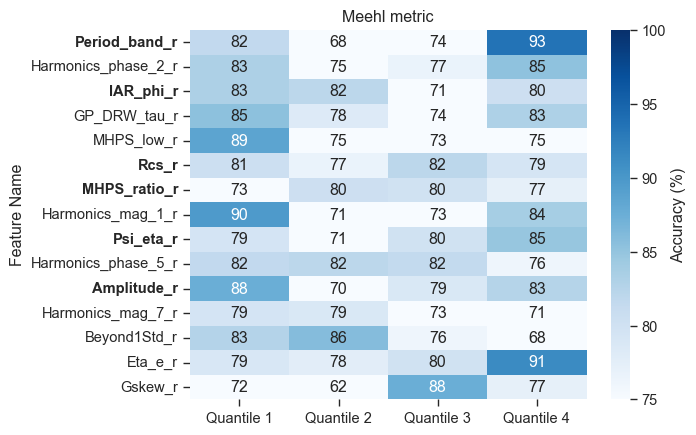

******************** Motyka ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.91
	Harmonics_phase_2_r feature: 0.91
	IAR_phi_r feature: 0.91
	GP_DRW_tau_r feature: 0.90
	MHPS_low_r feature: 0.89


	Rcs_r feature: 0.90
	MHPS_ratio_r feature: 0.91
	Harmonics_mag_1_r feature: 0.91
	Psi_eta_r feature: 0.90
	Harmonics_phase_5_r feature: 0.91


	Amplitude_r feature: 0.91
	Harmonics_mag_7_r feature: 0.89
	Beyond1Std_r feature: 0.90
	Eta_e_r feature: 0.90
	Gskew_r feature: 0.89


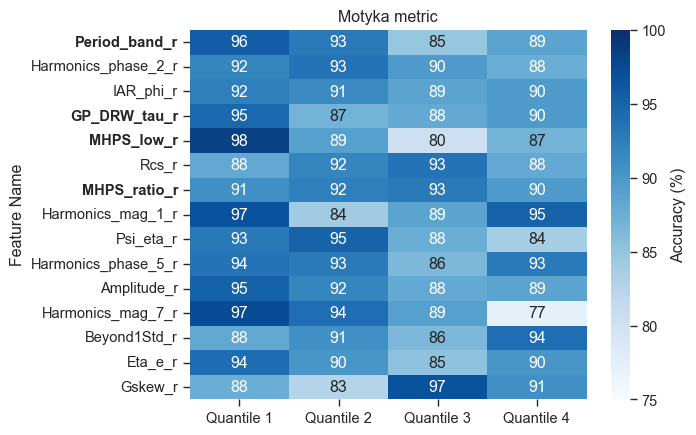

******************** Soergel ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.91
	Harmonics_phase_2_r feature: 0.91


	IAR_phi_r feature: 0.91


	GP_DRW_tau_r feature: 0.90


	MHPS_low_r feature: 0.89
	Rcs_r feature: 0.90
	MHPS_ratio_r feature: 0.91


	Harmonics_mag_1_r feature: 0.91


	Psi_eta_r feature: 0.90


	Harmonics_phase_5_r feature: 0.91
	Amplitude_r feature: 0.91
	Harmonics_mag_7_r feature: 0.89


	Beyond1Std_r feature: 0.90


	Eta_e_r feature: 0.90


	Gskew_r feature: 0.89


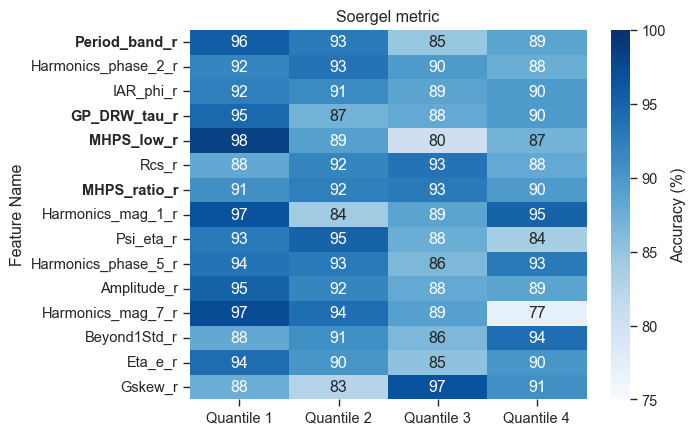

******************** Wave_Hedges ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.90
	Harmonics_phase_2_r feature: 0.90
	IAR_phi_r feature: 0.92


	GP_DRW_tau_r feature: 0.91
	MHPS_low_r feature: 0.90
	Rcs_r feature: 0.91


	MHPS_ratio_r feature: 0.92
	Harmonics_mag_1_r feature: 0.90
	Psi_eta_r feature: 0.91
	Harmonics_phase_5_r feature: 0.91


	Amplitude_r feature: 0.92
	Harmonics_mag_7_r feature: 0.90
	Beyond1Std_r feature: 0.91


	Eta_e_r feature: 0.92
	Gskew_r feature: 0.91


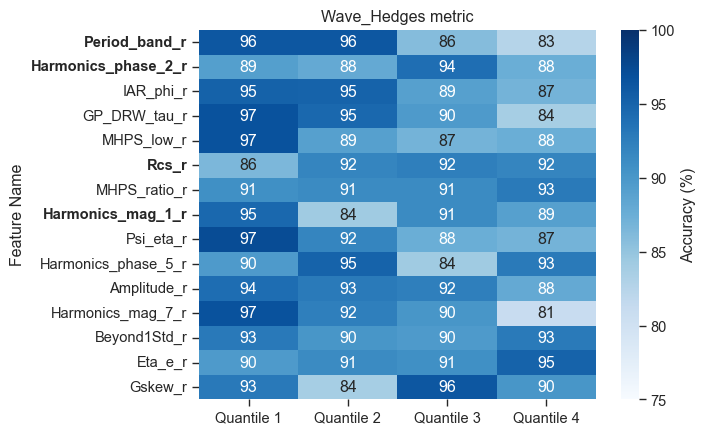

******************** Kulczynski ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.91
	Harmonics_phase_2_r feature: 0.91


	IAR_phi_r feature: 0.91


	GP_DRW_tau_r feature: 0.90
	MHPS_low_r feature: 0.89
	Rcs_r feature: 0.90
	MHPS_ratio_r feature: 0.91


	Harmonics_mag_1_r feature: 0.91


	Psi_eta_r feature: 0.90
	Harmonics_phase_5_r feature: 0.91
	Amplitude_r feature: 0.91
	Harmonics_mag_7_r feature: 0.89


	Beyond1Std_r feature: 0.90


	Eta_e_r feature: 0.90


	Gskew_r feature: 0.89


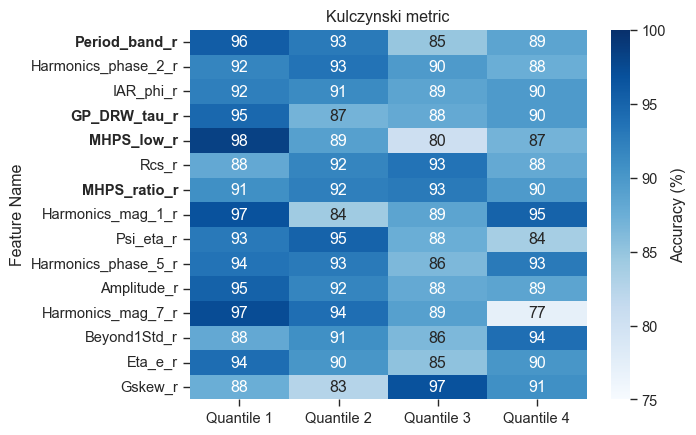

******************** Add_Chisq ********************


  0%|          | 0/15 [00:00<?, ?it/s]

	Period_band_r feature: 0.92
	Harmonics_phase_2_r feature: 0.91
	IAR_phi_r feature: 0.91
	GP_DRW_tau_r feature: 0.92


	MHPS_low_r feature: 0.91
	Rcs_r feature: 0.92
	MHPS_ratio_r feature: 0.91


	Harmonics_mag_1_r feature: 0.92
	Psi_eta_r feature: 0.92
	Harmonics_phase_5_r feature: 0.92
	Amplitude_r feature: 0.92


	Harmonics_mag_7_r feature: 0.91
	Beyond1Std_r feature: 0.91
	Eta_e_r feature: 0.92
	Gskew_r feature: 0.92


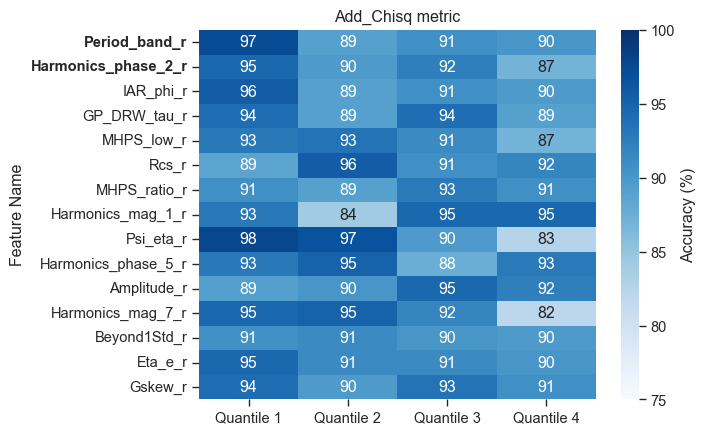

	Psi_eta_r feature: 0.92
	Harmonics_phase_5_r feature: 0.92
	Amplitude_r feature: 0.92
	Harmonics_mag_7_r feature: 0.91


	Beyond1Std_r feature: 0.91
	Eta_e_r feature: 0.92
	Gskew_r feature: 0.92


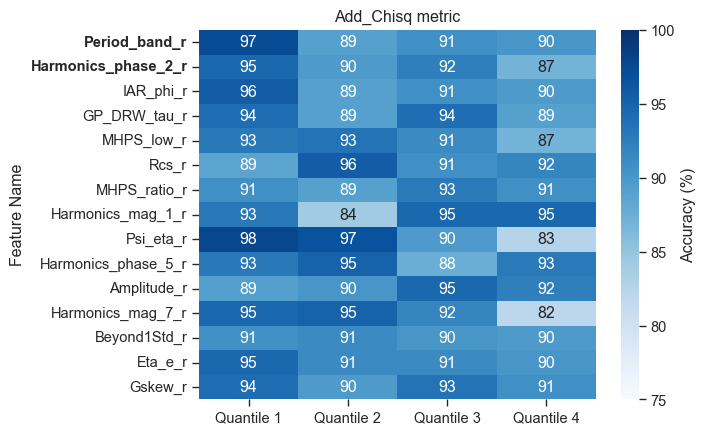

In [10]:
# for metric in tqdm([cd.wave_hedges]): EXAMINE wave_hedges, clark, add_chisq, maryland bridge

bestfeat_robust = []
common_best_feat = best_common_features[0]

for metric in tqdm(all_metrics):
    # for metric in tqdm([cd.clark, 'canberra', cd.hellinger]):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", results_subfolder, "distclassipy", metric_str)
    print("*" * 20, metric_str, "*" * 20)
    lcdc = dcpy.DistanceMetricClassifier(
        metric=metric, scale=True, 
        central_stat=settings_dict["central_stat"], 
        dispersion_stat=settings_dict["dispersion_stat"],
        calculate_kde=False, calculate_1d_dist=False
    )

    # Load best min features within 1 std of best score.
    sfs_df = pd.read_csv(os.path.join(locpath, "sfs_allfeatures.csv"), index_col=0)
    feats_idx, feats = utils.load_best_features(sfs_df)

    all_feats = X_df.columns

    # show SFS plot from before for this metric
    filepath = os.path.join(locpath, "sfs_allfeatures_plot_marked.pdf")
    display(IFrame(filepath, width=700, height=500))

    # Calculate the score for each quantile
    newfeats = []
    feat_quantile_scores = []

    # print("Total test score of all quantiles together:")

    # pbar = tqdm(feats, leave=False) # Loop through "best feats"
    pbar = tqdm(best_common_features, leave=False)  # Loop through best_common_features
    for feat in pbar:
        pbar.set_description(f"Feature: {feat}")
        try:
            quantiles = pd.qcut(X_df.loc[:, feat], q=4)  # q is number of splits
        except ValueError as ve:
            print(f"{feat}: {ve}. Continuing.")
            continue

        X_df_subset = X_df.loc[
            :, feats
        ]  # X_df with just the features important for this metric
        # X_df_subset["quantile"] = quantiles

        X = X_df_subset.to_numpy()
        # X_train, X_test, y_train, y_test = train_test_split(X_df_subset,y, test_size=0.33, stratify=[feat])
        X_train, X_test, y_train, y_test = train_test_split(
            X_df_subset, y_df, test_size=0.33, stratify=quantiles, random_state=44
        )

        lcdc.fit(X_train, y_train.to_numpy().ravel())
        acc_tot = lcdc.score(X_test, y_test)
        # y_preds_tot = lcdc.predict(X_test)
        # f1_tot = f1_score(y_preds_tot, y_test, average="macro")
        print(f"\t{feat} feature: {acc_tot:.2f}")
        # print(f"\t{feat} feature: {f1_tot:.2f}")
        grouped = X_test.groupby(quantiles)

        quantile_scores = []
        for i, (lims, subdf) in enumerate(grouped):
            y_pred = lcdc.predict(subdf.to_numpy())
            y_true = y_test.loc[subdf.index]
            # print(y_true["class"].value_counts())
            # f1 = f1_score(y_true, y_pred, average='macro')
            acc = accuracy_score(y_true, y_pred)

            # quantile_scores.append(f1)
            quantile_scores.append(acc)
        feat_quantile_scores.append(quantile_scores)
        newfeats.append(feat)

    feat_quantile_scores = np.array(feat_quantile_scores) * 100  # Change to percentage

    feat_quantile_scores_df = pd.DataFrame(
        data=feat_quantile_scores,
        index=newfeats,
        columns=[f"Quantile {i+1}" for i in range(4)],
    )
    # sorted by best-wors feats by default

    # CHANGE AXES FIG RATIO

    fig, ax = plt.subplots()
    sns.heatmap(
        feat_quantile_scores_df,
        ax=ax,
        annot=True,
        fmt=".0f",
        vmin=75,
        vmax=100,
        cmap="Blues",
        cbar_kws={"label": "Accuracy (%)"},
    )

    ax.set_title(f"{metric_str.title()} metric")
    ax.set_ylabel("Feature Name")

    # Embolden (or color red) the selected labels on the y axis
    ytick_labels = ax.get_yticklabels()
    # label_colors = [sns.color_palette()[3] if f in feats else 'black' for f in pbar]
    label_fontweights = ["bold" if f in feats else None for f in pbar]

    # for tick_label, color in zip(ytick_labels, label_colors):
    #     tick_label.set_color(color)
    for tick_label, fw in zip(ytick_labels, label_fontweights):
        tick_label.set_fontweight(fw)

    plt.savefig(os.path.join(locpath, "robustness_plot.pdf"), bbox_inches="tight")
    plt.show()

    sr = feat_quantile_scores_df.loc[common_best_feat]
    sr.name = metric_str
    bestfeat_robust.append(sr)

In [11]:
bestfeat_robust = pd.DataFrame(bestfeat_robust)
bestfeat_robust.index.name = common_best_feat
bestfeat_robust.index = bestfeat_robust.index.str.title()

In [12]:
columns = [f"Quantile {i+1}" for i in range(4)]

In [13]:
locpath

'results/c. multiclass/distclassipy/Add_Chisq'

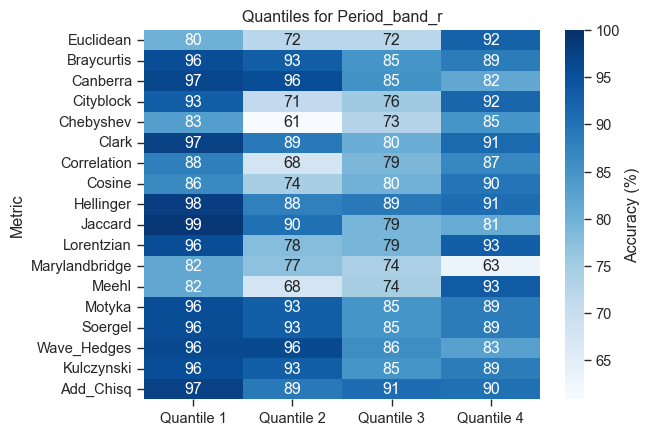

In [14]:
fig, ax = plt.subplots()
sns.heatmap(
    bestfeat_robust,
    ax=ax,
    annot=True,
    fmt=".0f",
    # vmin=80,
    vmax=100,
    cmap="Blues",
    cbar_kws={"label": "Accuracy (%)"},
)

ax.set_title(f"Quantiles for {common_best_feat}")
ax.set_ylabel("Metric")

plt.savefig(
    os.path.join(
        "results", results_subfolder, "distclassipy", "robustness_bestfeat.pdf"
    ),
    bbox_inches="tight",
)
plt.show()

In [15]:
# fig, ax = plt.subplots()
# sns.heatmap(bestfeat_robust, ax=ax,
#             annot=True, fmt='.0f',
#             # vmin=80,
#             vmax=100,
#             cmap="Blues",
#             cbar_kws={'label': 'Accuracy (%)'})

# ax.set_title(f"Quantiles for {common_best_feat}")
# ax.set_ylabel("Metric")

# plt.savefig(f"results/robustness_bestfeat.svg", bbox_inches = 'tight')
# plt.show()

In the robustness plot, I added all features on y axis, with the relevant ones for each metric coloured red. I also created a robustness plot for different features 